# Internal cross validation results

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
df = pd.read_json("results.json")
df = df.rename(columns={'filters_coeff': 'filters coefficient', 'n_filters': 'filters',
                        'kernel_size': 'kernel size', 'n_epochs': 'epochs', 
                        'zero_one_loss': 'zero one loss'},)
df.head()

,filters coefficient,filters,kernel size,epochs,zero one loss
0,same,16,3,10,505
1,same,16,3,15,443
2,same,16,3,20,428
3,same,16,5,10,513
4,same,16,5,15,510


### Loss over the epochs used for training

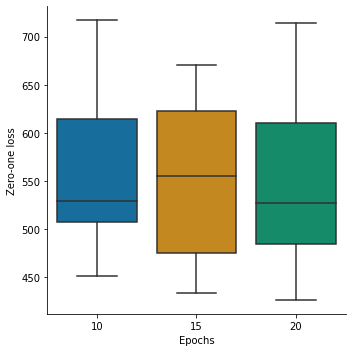

In [72]:
g = sns.catplot(data=df, x='epochs', y='zero one loss', kind='box', palette='colorblind')
g.set_axis_labels('Epochs', 'Zero-one loss')

plt.show()

### Loss over the number of filters used in the Conv2D layers

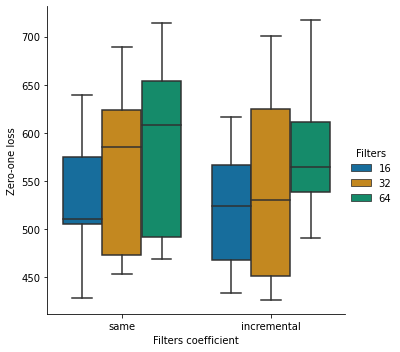

In [61]:
g = sns.catplot(data=df, x='filters coefficient', y='zero one loss', kind='box', palette='colorblind', hue='filters')
g.set_axis_labels('Filters coefficient', 'Zero-one loss')
g._legend.set_title('Filters')

plt.show()

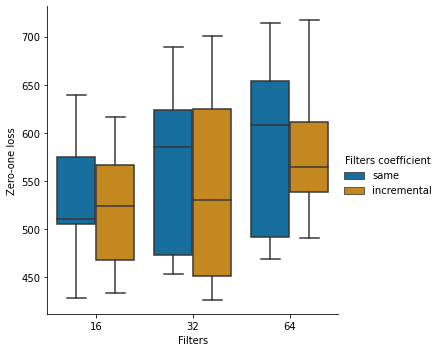

In [56]:
g = sns.catplot(data=df, x='filters', y='zero one loss', kind='box', palette='colorblind', hue='filters coefficient')
g.set_axis_labels('Filters', 'Zero-one loss')
g._legend.set_title('Filters coefficient')
    
plt.show()

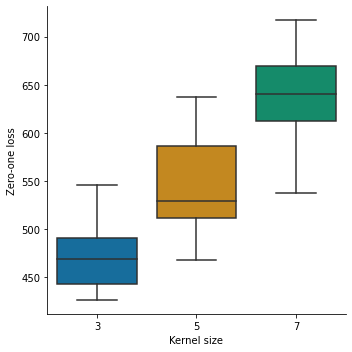

In [60]:
g = sns.catplot(data=df, x='kernel size', y='zero one loss', kind='box', palette='colorblind')
g.set_axis_labels('Kernel size', 'Zero-one loss')

plt.show()

# 5-fold cross validation results

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [5]:
data = {'Too simple CNN': [3865, 1406],
        'Simple CNN': [1600, 209],
        'Best model': [1044, 41],
        'Best model regularized': [841, 84],
        'VGG16': [115, 9]}

In [6]:
df = pd.DataFrame.from_dict(data=data, orient='index', columns=['Mean zero one loss', 'std zero one loss'])
df = df.reset_index().rename(columns={'index': 'Models'})
df

,Models,Mean zero one loss,std zero one loss
0,Too simple CNN,3865,1406
1,Simple CNN,1600,209
2,Best model,1044,41
3,Best model regularized,841,84
4,VGG16,115,9


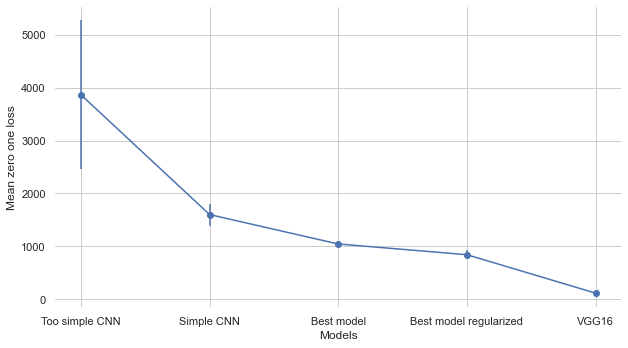

In [7]:
sns.set_theme(style="whitegrid")
g = sns.FacetGrid(data=df, height=5, aspect=16/9, palette="YlGnBu_d")
g.map(plt.errorbar, "Models", "Mean zero one loss", "std zero one loss", marker="o")
g.despine(left=True, bottom=True)

# plt.savefig('results.png', dpi=100)
plt.show()